In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("Credit_card.csv")
df_lab = pd.read_csv("Credit_card_label.csv")

In [3]:
data_cc = df.merge(df_lab, on = "Ind_ID", how = "left")

In [4]:
data_cc_1 = data_cc.drop(["Birthday_count", "Type_Occupation", "Employed_days"], axis=1)

In [5]:
data_cc_1.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID',
       'Family_Members', 'label'],
      dtype='object')

In [6]:
data_cc_1.dropna(inplace=True)
data_cc_1.isna().sum()

Ind_ID            0
GENDER            0
Car_Owner         0
Propert_Owner     0
CHILDREN          0
Annual_income     0
Type_Income       0
EDUCATION         0
Marital_status    0
Housing_type      0
Mobile_phone      0
Work_Phone        0
Phone             0
EMAIL_ID          0
Family_Members    0
label             0
dtype: int64

In [7]:
data_cc_1.duplicated().sum() # '0' so no need to drop duplicates

0

In [8]:
AVG_INCOME = data_cc_1['Annual_income'].mean()

AVG_INCOME = data_cc_1.groupby("EDUCATION")["Annual_income"].mean()

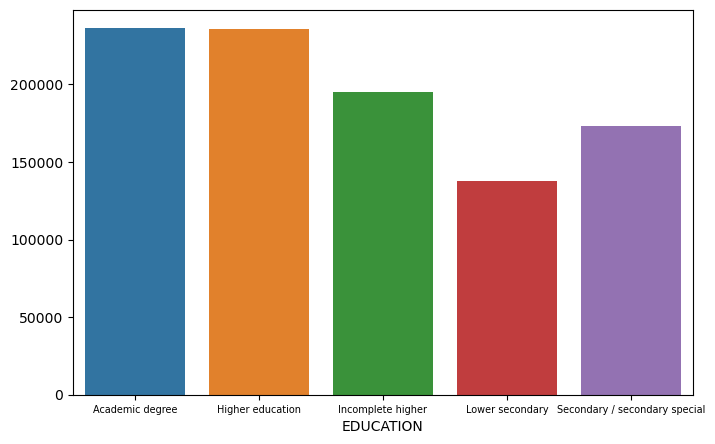

In [9]:
plt.figure(figsize=(8, 5))
plt.tight_layout()
ax = sns.barplot(x= AVG_INCOME.index, y = AVG_INCOME.values)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.show()

In [10]:
C_O = data_cc_1.groupby("Car_Owner")["Annual_income"].mean()
C_O

Car_Owner
N    171674.035714
Y    219417.927632
Name: Annual_income, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

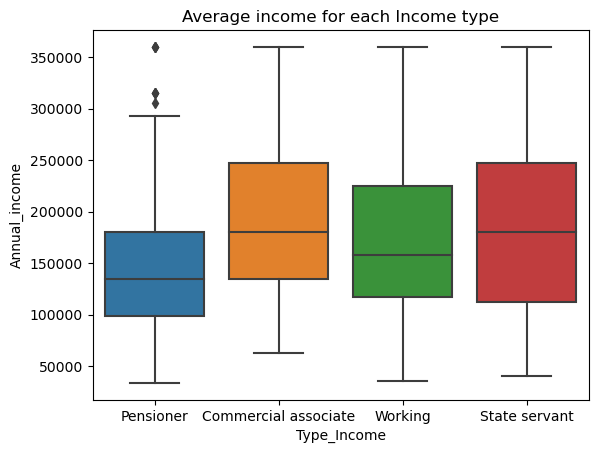

In [11]:
Q1 = data_cc_1['Annual_income'].quantile(0.25)
Q3 = data_cc_1['Annual_income'].quantile(0.75)
IQR = Q3 - Q1

data_cc_1 = data_cc_1[~((data_cc_1['Annual_income'] < (Q1 - 1.5 * IQR)) | 
                        (data_cc_1['Annual_income'] > (Q3 + 1.5 * IQR)))]

sns.boxplot(x="Type_Income", y="Annual_income", data=data_cc_1)
plt.title('Average income for each Income type')
plt.show

In [12]:
data_cc_1

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,1,0,0,0,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,2,1
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,5118268,M,Y,N,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,1,0,1,0,3,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,1,0,0,0,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,1,0,0,0,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,1,1,1,0,2,0


In [13]:
data_ml = data_cc_1[['Car_Owner', 'Propert_Owner','Annual_income', 'Type_Income', 
                    'EDUCATION', 'Housing_type',  'Family_Members', 'label']].copy()

# Uses .copy() so the program knows we have made a copy of the dataset
# This is so the following code can enable properly.
# Otherwise we get:
'''A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead'''

'A value is trying to be set on a copy of a slice from a DataFrame.\nTry using .loc[row_indexer,col_indexer] = value instead'

In [14]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

In [15]:
data_ml['Car_Owner'] = labelencoder.fit_transform(data_ml["Car_Owner"])
data_ml['Propert_Owner'] = labelencoder.fit_transform(data_ml['Propert_Owner'])
data_ml["Type_Income"] = labelencoder.fit_transform(data_ml['Type_Income'])
data_ml["EDUCATION"] = labelencoder.fit_transform(data_ml["EDUCATION"])
data_ml["Housing_type"] = labelencoder.fit_transform(data_ml["Housing_type"])
data_ml["label"] = labelencoder.fit_transform(data_ml["label"])

# 'labelencoder' can only work with categorical strings.
# categories will be converted to numbers. 

In [16]:
data_ml

,Car_Owner,Propert_Owner,Annual_income,Type_Income,EDUCATION,Housing_type,Family_Members,label
0,1,1,180000.0,1,1,1,2,1
1,1,0,315000.0,0,1,1,2,1
2,1,0,315000.0,0,1,1,2,1
4,1,0,315000.0,0,1,1,2,1
6,1,0,315000.0,0,1,1,2,1
...,...,...,...,...,...,...,...,...
1542,1,0,360000.0,2,4,1,3,0
1544,0,0,225000.0,0,2,1,1,0
1545,1,1,180000.0,3,1,1,4,0
1546,1,0,270000.0,3,4,1,2,0


In [17]:
X=data_ml.drop(columns=["label"], axis=1)
y=data_ml["label"]

In [18]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, y_train, y_test = train_test_split(X,y, test_size=0.2)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_Train)
scaled_X_test = scaler.transform(X_Test)

from sklearn.metrics import accuracy_score

def modelperform(predictions):
    print("Accuracy score on model is {}".format(accuracy_score(y_test, predictions)))

In [19]:
from sklearn.linear_model import LogisticRegression

log_mod = LogisticRegression()
log_mod.fit(scaled_X_train, y_train)

LogisticRegression()

In [20]:
log_pre = log_mod.predict(scaled_X_test)

In [21]:
modelperform(log_pre)

Accuracy score on model is 0.8931034482758621


In [22]:
from sklearn.neighbors import KNeighborsClassifier

k_mod = KNeighborsClassifier(n_neighbors=10)
k_mod.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [23]:
k_pre = k_mod.predict(scaled_X_test)
modelperform(k_pre)

Accuracy score on model is 0.896551724137931


In [24]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

X_train = X

feature_names = X_train.columns 

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(scaled_X_train, y_train)

rfe = RFE(estimator=rf, n_features_to_select=5)
rfe.fit(scaled_X_train, y_train)

rf_pre = rf.predict(scaled_X_test)
modelperform(rf_pre)

selected_features = feature_names[rfe.support_]
print("Selected features:", selected_features.tolist())

Accuracy score on model is 0.896551724137931
Selected features: ['Annual_income', 'Type_Income', 'EDUCATION', 'Housing_type', 'Family_Members']


In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
ada_class = AdaBoostClassifier()

ada_para_grid = {
    "n_estimators": [40, 120, 240],
    "learning_rate": [0.01, 0.1, 1, 10]
}

ada_grid_search = GridSearchCV(ada_class, ada_para_grid, cv=2)

In [50]:
ada_grid_search.fit(scaled_X_train, y_train)

GridSearchCV(cv=2, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'n_estimators': [40, 120, 240]})

In [52]:
adapre = ada_grid_search.predict(scaled_X_test)
modelperform(adapre)

Accuracy score on model is 0.8931034482758621
